<a href="https://colab.research.google.com/github/yooje153/-/blob/main/Chapter01_%EC%9C%A0%EC%9E%AC%EC%9D%80_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D%EC%9C%BC%EB%A1%9C_%EC%8B%AC%EB%B6%80%EC%A0%84%EC%A6%9D%EC%9D%84_%EC%98%88%EB%B0%A9%ED%95%A0_%EC%88%98_%EC%9E%88%EC%9D%84%EA%B9%8C(%ED%95%B4%EC%84%A4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 주제 : 데이터 분석으로 심부전증을 예방할 수 있을까?
----------

## 실습 가이드
    1. 데이터를 다운로드하여 Colab에 불러옵니다.
    2. 필요한 라이브러리는 모두 코드로 작성되어 있습니다.
    3. 코드는 위에서부터 아래로 순서대로 실행합니다.
    
    
## 데이터 소개
    - 이번 주제는 Heart Failure Prediction 데이터셋을 사용합니다.
    
    - 다음 1개의 csv 파일을 사용합니다.
    heart_failure_clinical_records_dataset.csv
    
    - 각 파일의 컬럼은 아래와 같습니다.
    age: 환자의 나이
    anaemia: 환자의 빈혈증 여부 (0: 정상, 1: 빈혈)
    creatinine_phosphokinase: 크레아틴키나제 검사 결과
    diabetes: 당뇨병 여부 (0: 정상, 1: 당뇨)
    ejection_fraction: 박출계수 (%)
    high_blood_pressure: 고혈압 여부 (0: 정상, 1: 고혈압)
    platelets: 혈소판 수 (kiloplatelets/mL)
    serum_creatinine: 혈중 크레아틴 레벨 (mg/dL)
    serum_sodium: 혈중 나트륨 레벨 (mEq/L)
    sex: 성별 (0: 여성, 1: 남성)
    smoking: 흡연 여부 (0: 비흡연, 1: 흡연)
    time: 관찰 기간 (일)
    DEATH_EVENT: 사망 여부 (0: 생존, 1: 사망)
    
    
    
- 데이터 출처: https://www.kaggle.com/andrewmvd/heart-failure-clinical-data


## 최종 목표
    - 의료 데이터와 그 분석에 대한 이해
    - Colab 및 Pandas 라이브러리 사용법 이해
    - 데이터 시각화를 통한 인사이트 습득 방법의 이해
    - Scikit-learn 기반의 모델 학습 방법 습득
    - Classification 모델의 학습과 평가 방법 이해

- 출제자 : 신제용 강사
---

## Step 0. 의료 데이터셋에 대하여

### 의료 데이터의 수집


### 의료 데이터 분석의 현재


### Accuracy, Precision, 그리고 Recall

## Step 1. 데이터셋 준비하기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 문제 1. Colab Notebook에 Kaggle API 세팅하기


In [2]:
import os

In [3]:
# os.environ을 이용하여 Kaggle API Username, Key 세팅하기
os.environ['KAGGLE_USERNAME'] = 'fastcampuskim'
os.environ['KAGGLE_KEY'] = 'c939a1e37f5ca93b6406a66fc8bb08e5'

### 문제 2. 데이터 다운로드 및 압축 해제하기


In [4]:
# Linux 명령어로 Kaggle API를 이용하여 데이터셋 다운로드하기 (!kaggle ~)
# Linux 명령어로 압축 해제하기
!kaggle datasets download -d andrewmvd/heart-failure-clinical-data
!unzip '*.zip'

  0% 0.00/3.97k [00:00<?, ?B/s]
100% 3.97k/3.97k [00:00<00:00, 2.77MB/s]
Archive:  heart-failure-clinical-data.zip
  inflating: heart_failure_clinical_records_dataset.csv  


In [5]:
!ls

heart-failure-clinical-data.zip		    sample_data
heart_failure_clinical_records_dataset.csv


### 문제 3. Pandas 라이브러리로 csv파일 읽어들이기


In [6]:
# pd.read_csv()로 csv파일 읽어들이기
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [7]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


## Step 2. EDA 및 데이터 기초 통계 분석


### 문제 4. 데이터프레임의 각 컬럼 분석하기


In [8]:
# DataFrame에서 제공하는 메소드를 이용하여 컬럼 분석하기 (head(), info(), describe())
df.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


모든 컬럼이 수치형 데이터

In [10]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


### 문제 5. 수치형 데이터의 히스토그램 그리기


<Axes: xlabel='age', ylabel='Count'>

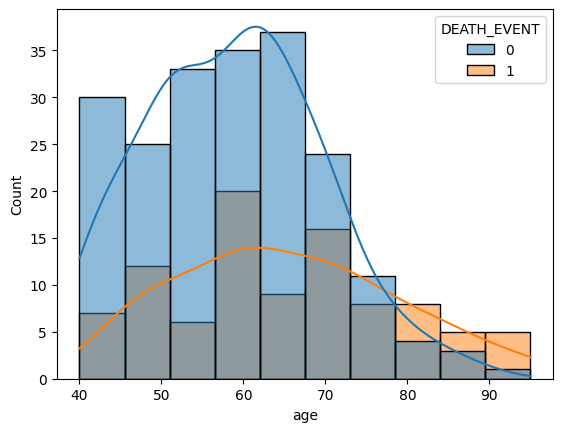

In [11]:
# seaborn의 histplot, jointplot, pairplot을 이용해 히스토그램 그리기
sns.histplot(x='age', data=df, hue='DEATH_EVENT', kde=True)

<Axes: xlabel='creatinine_phosphokinase', ylabel='Count'>

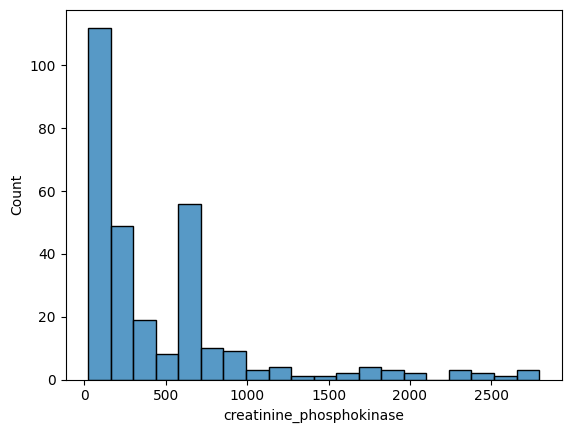

In [12]:
sns.histplot(data=df.loc[df['creatinine_phosphokinase'] < 3000, 'creatinine_phosphokinase'])

<Axes: xlabel='ejection_fraction', ylabel='Count'>

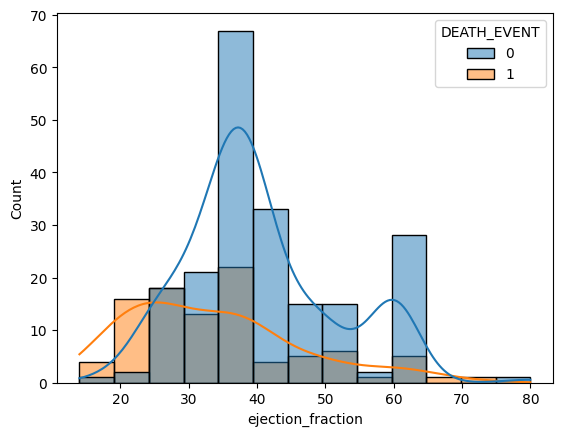

In [13]:
sns.histplot(x='ejection_fraction', data=df, bins=13, hue='DEATH_EVENT', kde=True)

<Axes: xlabel='platelets', ylabel='Count'>

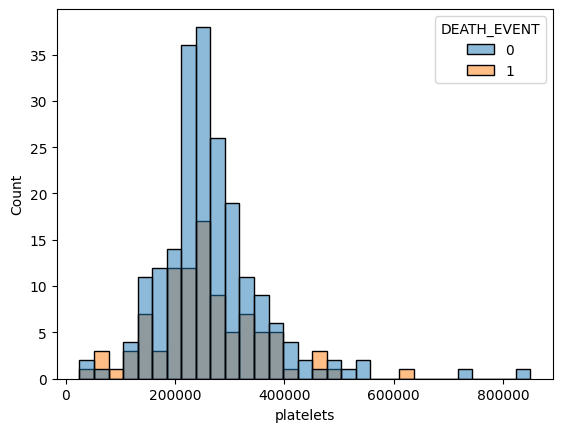

In [14]:
sns.histplot(x='platelets', data=df, hue='DEATH_EVENT')

<Axes: xlabel='time', ylabel='Count'>

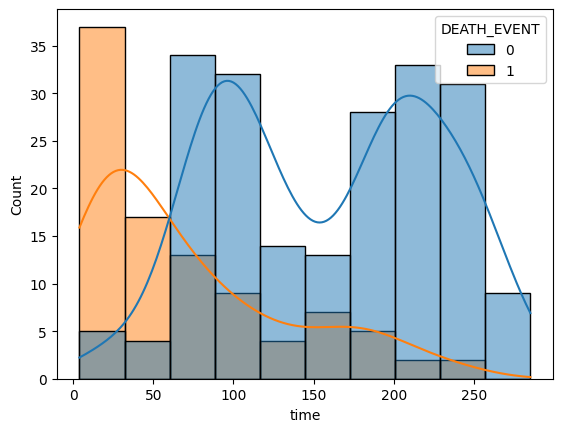

In [15]:
sns.histplot(x='time', data=df, hue='DEATH_EVENT', kde=True)

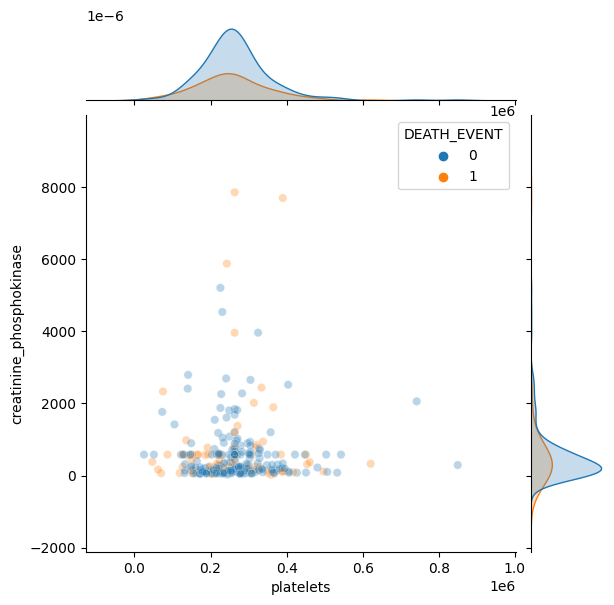

In [16]:
sns.jointplot(x='platelets', y='creatinine_phosphokinase', hue='DEATH_EVENT', data=df, alpha=0.3)

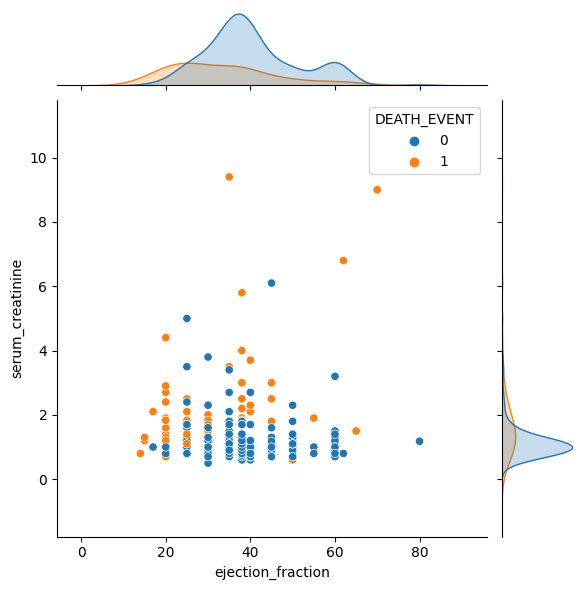

In [17]:
sns.jointplot(x='ejection_fraction', y='serum_creatinine', data=df, hue='DEATH_EVENT')

### 문제 6. Boxplot 계열을 이용하여 범주별 통계 확인하기


<Axes: xlabel='DEATH_EVENT', ylabel='ejection_fraction'>

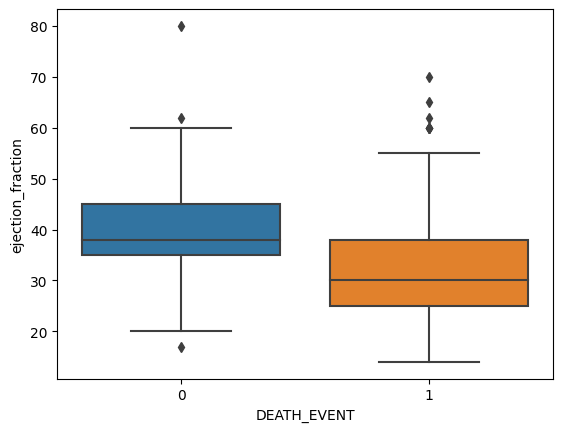

In [18]:
# seaborn의 Boxplot 계열(boxplot(), violinplot(), swarmplot())을 사용
# Hint) hue 키워드를 사용하여 범주 세분화 가능
sns.boxplot(x='DEATH_EVENT', y='ejection_fraction', data=df)

<Axes: xlabel='smoking', ylabel='ejection_fraction'>

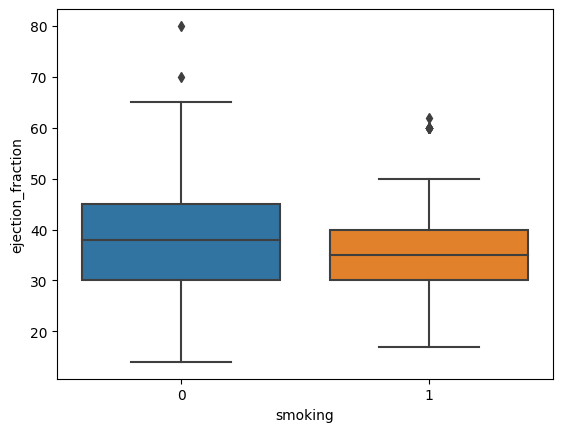

In [19]:
sns.boxplot(x='smoking', y='ejection_fraction', data=df)

<Axes: xlabel='DEATH_EVENT', ylabel='ejection_fraction'>

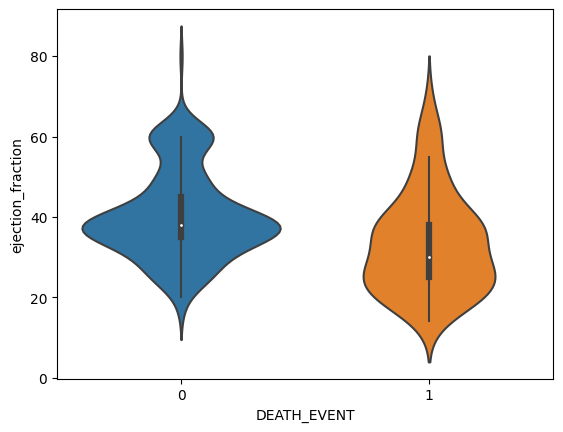

In [20]:
sns.violinplot(x='DEATH_EVENT', y='ejection_fraction', data=df)

<Axes: xlabel='DEATH_EVENT', ylabel='platelets'>

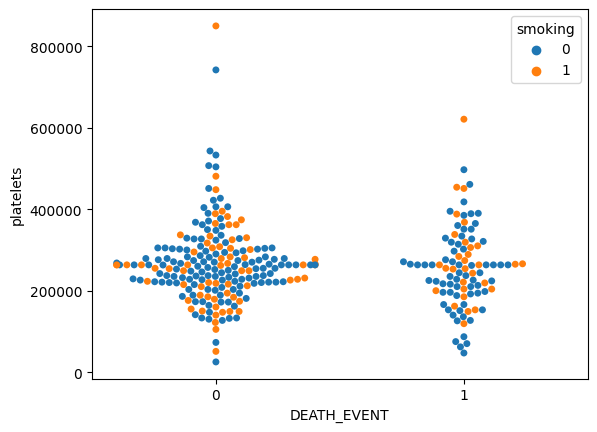

In [21]:
sns.swarmplot(x='DEATH_EVENT', y='platelets', hue='smoking', data=df)

## Step 3. 모델 학습을 위한 데이터 전처리


### 문제 7. StandardScaler를 이용하여 데이터 전처리하기


- 표준화: 평균이 0 분산이 1인 가우시안 정규 누포를 가진 값으로 변환
- x_new=(x-mean)/stdev(x)

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [24]:
# 수치형 입력 데이터, 범주형 입력 데이터, 출력 데이터로 구분하기
X_num = df[['age', 'creatinine_phosphokinase','ejection_fraction', 'platelets','serum_creatinine', 'serum_sodium']]
X_cat = df[['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']]
y = df['DEATH_EVENT']

In [25]:
# 수치형 입력 데이터를 전처리하고 입력 데이터 통합하기
scaler = StandardScaler()
scaler.fit(X_num)
X_scaled = scaler.transform(X_num)
X_scaled = pd.DataFrame(data=X_scaled, index=X_num.index, columns=X_num.columns)
X = pd.concat([X_scaled, X_cat], axis=1)

In [26]:
X.head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,anaemia,diabetes,high_blood_pressure,sex,smoking
0,1.192945,0.000166,-1.530560,1.681648e-02,0.490057,-1.504036,0,0,1,1,0
1,-0.491279,7.514640,-0.007077,7.535660e-09,-0.284552,-0.141976,0,0,0,1,0
2,0.350833,-0.449939,-1.530560,-1.038073e+00,-0.090900,-1.731046,0,0,0,1,1
3,-0.912335,-0.486071,-1.530560,-5.464741e-01,0.490057,0.085034,1,0,0,1,0
4,0.350833,-0.435486,-1.530560,6.517986e-01,1.264666,-4.682176,1,1,0,0,0


### 문제 8. 학습데이터와 테스트데이터 분리하기


In [27]:
from sklearn.model_selection import train_test_split

In [28]:
# train_test_split() 함수로 학습 데이터와 테스트 데이터 분리하기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

## Step 4. Classification 모델 학습하기


### 문제 9. Logistic Regression 모델 생성/학습하기


범주형 형태로 되어 있는 종속변수에 대하여, 한 개 이상의 설명변수들을 가지고 이를 추측하기 위해 회귀분석을 하는 것

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
# LogisticRegression 모델 생성/학습
model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

### 문제 10. 모델 학습 결과 평가하기


In [31]:
from sklearn.metrics import classification_report

In [32]:
# Predict를 수행하고 classification_report() 결과 출력하기
pred = model_lr.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.78      0.92      0.84        64
           1       0.64      0.35      0.45        26

    accuracy                           0.76        90
   macro avg       0.71      0.63      0.65        90
weighted avg       0.74      0.76      0.73        90



- 정밀도(precision): 예측을 Positive로 한 대상 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율 (양성 예측도)
- 재현율(recall): 실제 값이 Positive인 대상 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율 (민감도, TPR)
- F1 score: F1 스코어는 정밀도와 재현율이 어느 한 쪽으로 치우치치 않는 수치를 나타낼 때 상대적으로 높은 값
- support: 각 라벨의 실제 샘플 개수
- accuracy: 예측 결과가 동일한 데이터 건수 / 전체 예측 데이터 건수
- macro avg: 각 클래스 별로 동일한 가중치를 부여한다. 즉 샘플 개수의 불균형을 고려하지 않는 평균
- weighted avg: 각 클래스에 속하는 표본의 개수로 가중 평균

### 문제 11. XGBoost 모델 생성/학습하기


부스팅 알고리즘은 여러 개의 약한 학습기(weak learner)를 순차적으로 학습-예측하면서 잘못 예측한 데이터에 가중치 부여를 통해 오류를 개선해 나가면서 학습하는 방식

GBM도 에이다부스트와 유사하나, 가중치 업데이트를 경사 하강법을 이용하는 것이 큰 차이

GBM기반 각광받고 있는 것은 XGBoost와 LightGBM

- 뛰어난 예측 성능: 분류와 회귀 영역에서
- GBM 대비 빠른 수행 시간: 일반적인 GBM은 순차적으로 Weak learner가 가중치를 증감하는 방법으로 학습하기 때문에 전반적으로 속도가 느림, 하지만 XGBoost는 병렬 수행 및 다양한 기능으로 GBM에 비해 빠른 수행 성능을 보장, 그래도 GBM에 비해 빠르다는 것이지 랜덤 포레스트 같은 다른 알고리즘에 비해 빠른 것은 아님
- 과적합 규제: 표준 GBM의 경우 과적합 규제 기능이 없으나 XGBoost는 자체에 과적합 규제 기능이 있음
- Tree pruning: 일반적으로 GBM은 분할 시 부정 손실이 발생하면 분할을 더 이상 수행하지 않지만, 이러한 방식도 자칫 지나치게 많은 분할을 발생할 수 있음, 다른 GBM과 마찬가지로 max_depth 파라미터로 분할 깊이를 조정하기도 하지만, tree pruning으로 더 이상 긍정 이득이 없는 분할을 가지치기 해서 분할 수를 더 줄이는 추가적인 장점이 있음
- 자체 내장된 교차 검증: XGBoost는 반복 수행 시마다 내부적으로 학습 데이터와 평가 데이터에 대한 교차 검증을 수행해 최적화된 반복 수행 횟수 가짐. 지정된 반복 횟수가 아니라 교차 검증을 통해 평가 데이터의 평가 값이 최적화 되면 반복을 중간에 멈출 수 있는 조기 중단 기능 있음
- 결손값 자체 처리: 결손값을 자체 저리할 수 있는 기능이 있음

In [33]:
from xgboost import XGBClassifier

In [34]:
# XGBClassifier 모델 생성/학습
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

### 문제 12. 모델 학습 결과 평가하기


In [35]:
# Predict를 수행하고 classification_report() 결과 출력하기
pred = model_xgb.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84        64
           1       0.62      0.50      0.55        26

    accuracy                           0.77        90
   macro avg       0.72      0.69      0.70        90
weighted avg       0.76      0.77      0.76        90



### 문제 13. 특징의 중요도 확인하기


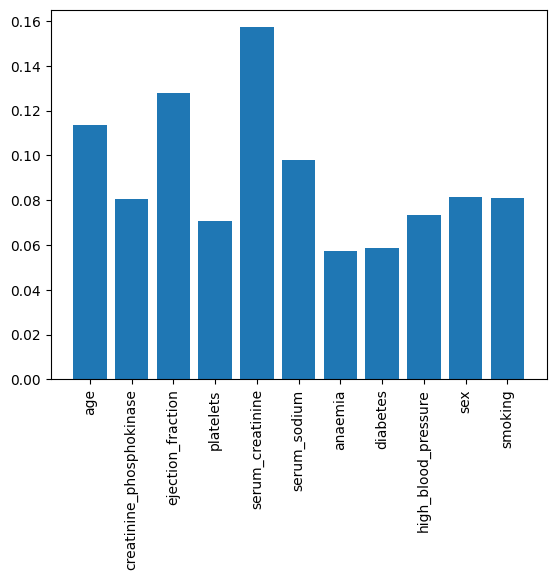

In [36]:
# XGBClassifier 모델의 feature_importances_를 이용하여 중요도 plot
plt.bar(X.columns, model_xgb.feature_importances_)
plt.xticks(rotation=90)
plt.show()

- xgboost의 plot_importance() API는 피처의 중요도를 막대그래프 형식으로 나타냄
- 기본 평가 지표로 f스코어를 기반으로 해당 피처의 중요도를 나타냄
- f스코어는 해당 피처가 트리 분할 시 얼마나 자주 사용되었는지를 나타냄
- 사이킷런은 Estimator객체의 feature_importnaces_속성을 이용해 직접 시각화 코드 작성
- xgboost 패키지는 plot_importance()를 이용해 바로 피처 중요도 시각화

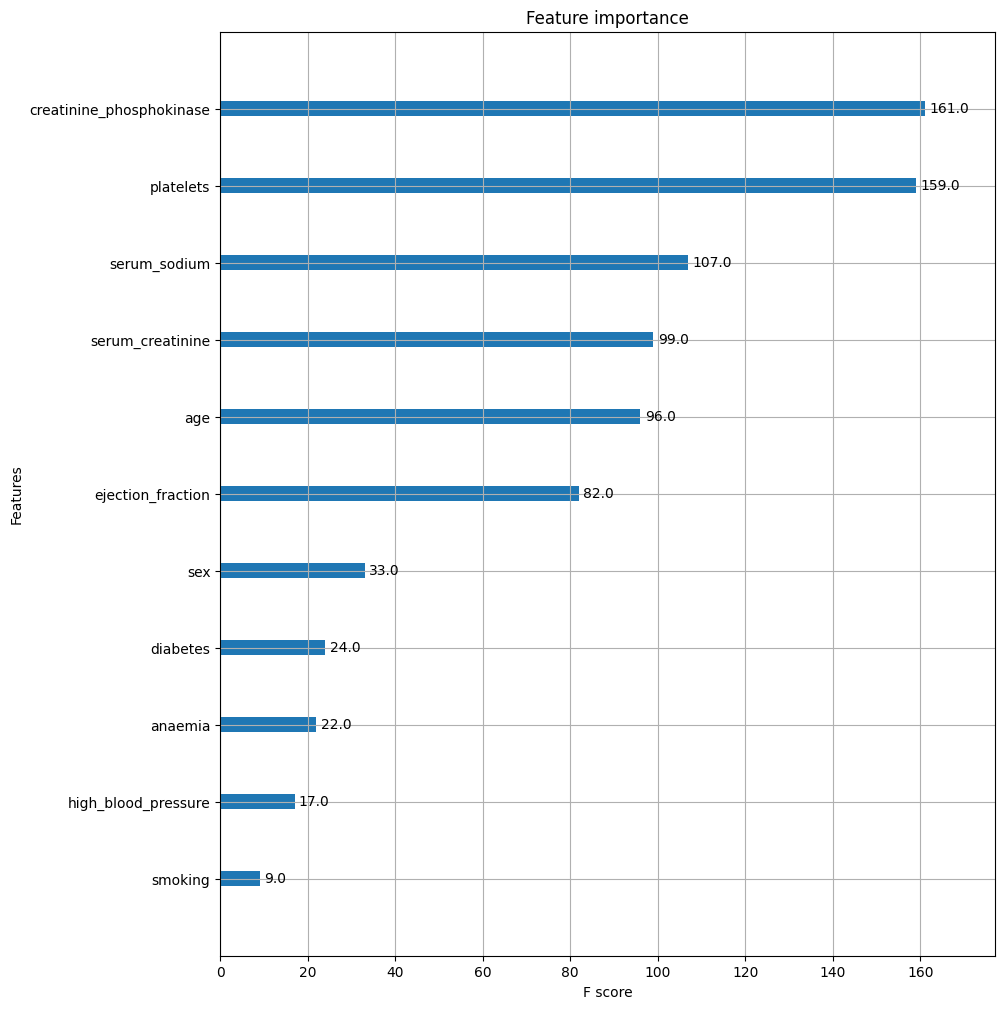

In [40]:
import matplotlib.pyplot as plt
from xgboost import plot_importance
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(model_xgb, ax=ax)
plt.savefig('p239_xgb_feature_importance.tif', format='tif', dpi=300, bbox_inches='tight')

## Step5 모델 학습 결과 심화 분석하기


### 문제 14. Precision-Recall 커브 확인하기

정밀도/재현율 트레이드 오프


- 정밀도 또는 재현율이 특별이 강조돼야 할 경우 분류의 결정 임곗값(Threshold)을 조정해 정밀도 또는 재현율 수치 높일 수 있음
- 하지만 정밀도와 재현율은 상호 보완적인 평가 지표이기 때문에 어느 한 쪽을 강제로 높이면 다른 하나의 수치는 떨어지기 쉬움 (Trade-off)
- 분류 알고리즘은 개별 레이블별로 결정 확률을 구함, 예측 확률이 큰 레이블값으로 예측
- 이진 분류 모델에서 특정 데이터가 0이 될 확률 10%, 1이 될 확률 90%면 90%확률 가진 1로 예측
- 일반적으로 이진 분류에서는 임곗값을 0.5, 즉 50%정하고, 이 기준 값보다 확률이 크면 Positive, 작으면 Negative로 결정

- 임곗값을 낮추니 재현율 값이 올라가고 정밀도가 떨어짐
- 확률이 0.5가 아닌 0.4부터 Positive로 예측을 더 너그럽게 하기 때문에 임곗값 값을 낮출수록 True값이 많아짐.
- Positive 예측값이 많아지면 상대적으로 재현율 값이 높아짐, 양성 예측을 많이 하다 보니 실제 양성을 음성으로 예측하는 횟수가 줄어들기 때문


- 입력 파라미터) y_true: 실제 클래스값 배열(배열 크기=[데이터 건수]) /probas_pred: Positive칼럼의 예측 확률 배열(배열 크기=[데이터 건수])
- 반환 값) 정밀도: 임곗값별 정밀도 값을 배열로 반환 / 재현율: 임곗값별 재현율 값을 배열로 반환

precision_recall_curve()는 정밀도와 재현율의 임곗값에 따른 값 변화를 곡선 형태의 그래프로 시각화할 수 있음

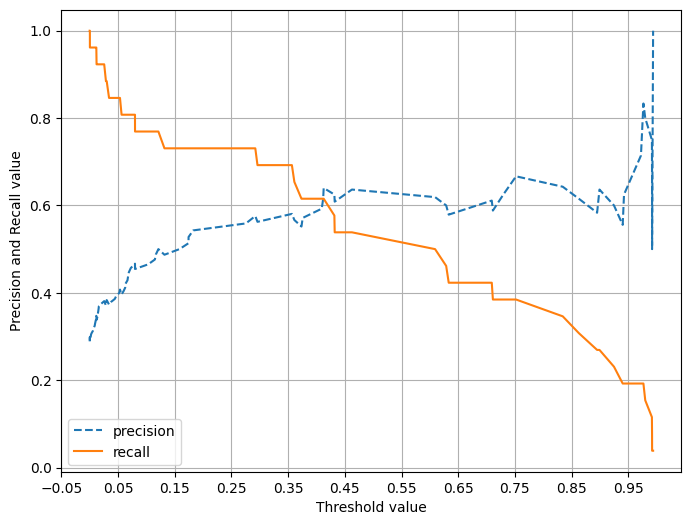

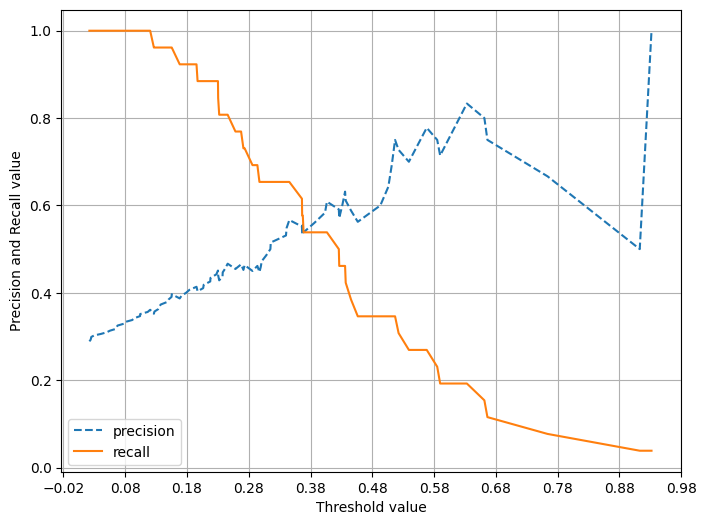

In [49]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test , pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    
precision_recall_curve_plot( y_test, model_xgb.predict_proba(X_test)[:, 1] )
precision_recall_curve_plot( y_test, model_lr.predict_proba(X_test)[:, 1] )

In [37]:
from sklearn.metrics import plot_precision_recall_curve

ImportError: ignored

NameError: ignored

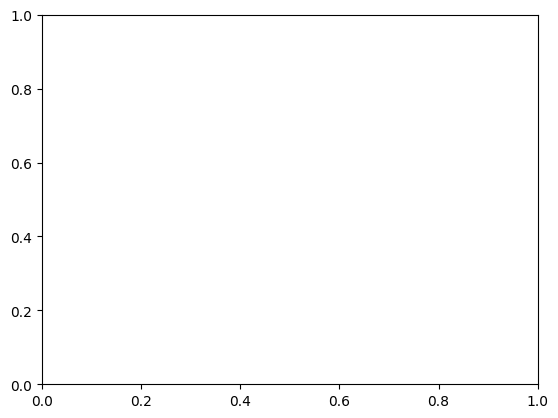

In [44]:
# 두 모델의 Precision-Recall 커브를 한번에 그리기 (힌트: fig.gca()로 ax를 반환받아 사용)
fig = plt.figure()
ax = fig.gca()
plot_precision_recall_curve(model_lr, X_test, y_test, ax=ax)
plot_precision_recall_curve(model_xgb, X_test, y_test, ax=ax)

### 문제 15. ROC 커브 확인하기

- ROC 곡선과 이에 기반한 AUC 스코어는 이진 분류의 예측 성능 측정에서 중요한 지표
- FPR(X축)이 변할 때 TPR(Y축)이 어떻게 변하는지를 나타내는 곡선

- TPR은 재현율, TP=(FN+FP), 민감도
- 민감도에 대응하는 지표로 TNR, 특이성

- 민감도(TPR)는 실제값 Positive가 정확히 예측돼야 하는 수준(질병이 있는 사람은 질병이 있는 것으로)
- 특이성(TNR)은 실제값 Negative가 정확히 예측돼야 하는 수준(질병이 없는 사람은 질병이 없는 것으로)

- TNR=TN/(FP+TN)
- ROC곡선의 X축인 FPR은 FP/(FP+TN)이므로 1-TNR

<img src = "https://raw.githubusercontent.com/angeloyeo/angeloyeo.github.io/master/pics/2020-08-05-ROC/pic1.png" width="50%" height="50%">

- 대각선은 동전을 무작위로 던져 앞/뒤를 맞추는 랜덤 수준의 이진 분류 ROC직선(AUC는 0.5)
- 가운데 직선에 가까울수록 성능이 떨어지고 멀어질수록 성능이 뛰어난 것

- ROC곡선은 FPR을 0부터 1까지 변경하면서 TPR의 변화값을 구함
- FPR을 0으로 만들려면 임곗값을 1로 지정
- FPR=FP/(FP+TN)
- 아예 Positive로 예측하지 않아 FP값이 0이 됨

- FPR을 1로 만드려면 TN을 0으로 하면 됨
- 분류 임곗값을 0으로 지정, Positive 확률 기준이 낮아 다 Positive로 예측
- 아예 Negative가 없어서 TN이 0이 되고 FPR은 1이 됨
- 임곗값을 1부터 0으로 변화시키면서 FPR을 구하고 이 변화에 따른 TPR값을 구하는 것이 ROC곡선

-입력 파라미터) y_true: 실제 클래스 값 array (array shape=[데이터 건수])/ y_score:predict_proba()의 반환 값 array에서 Positive칼럼의 예측 확률(array.shape=[n_samples]
- 반환 값: fpr, tpr, thresholds를 array로

- 임곗값이 1에 가까운 값에서 점점 작아지면서 FPR이 점점 커짐
- FPR이 조금씩 커질 때 TPR이 가파르게 커짐

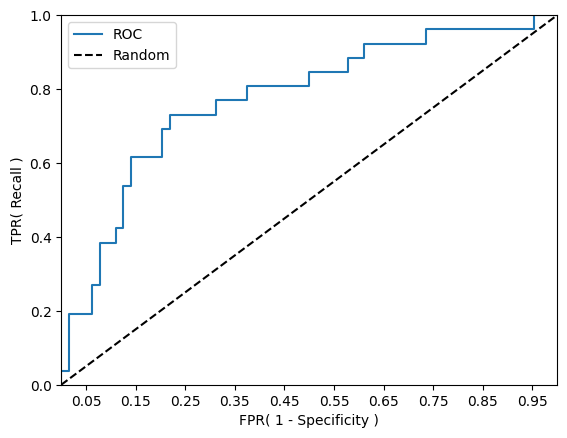

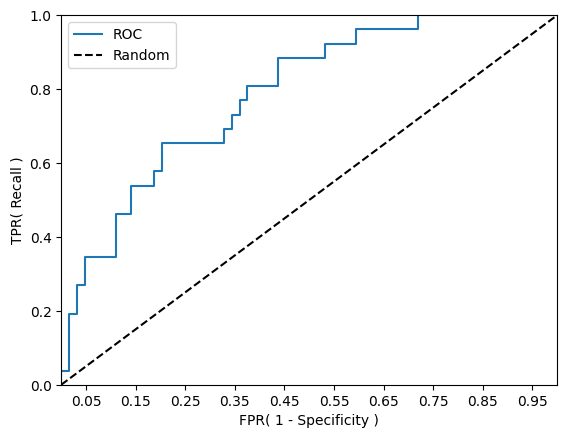

In [50]:
from sklearn.metrics import roc_curve

def roc_curve_plot(y_test , pred_proba_c1):
    # 임곗값에 따른 FPR, TPR 값을 반환 받음. 
    fprs , tprs , thresholds = roc_curve(y_test ,pred_proba_c1)

    # ROC Curve를 plot 곡선으로 그림. 
    plt.plot(fprs , tprs, label='ROC')
    # 가운데 대각선 직선을 그림. 
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    
    # FPR X 축의 Scale을 0.1 단위로 변경, X,Y 축명 설정등   
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Specificity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
    
roc_curve_plot(y_test, model_xgb.predict_proba(X_test)[:, 1] )
roc_curve_plot(y_test, model_lr.predict_proba(X_test)[:, 1] )

In [45]:
from sklearn.metrics import plot_roc_curve

ImportError: ignored

In [ ]:
# 두 모델의 ROC 커브를 한번에 그리기 (힌트: fig.gca()로 ax를 반환받아 사용)
fig = plt.figure()
ax = fig.gca()
plot_roc_curve(model_lr, X_test, y_test, ax=ax)
plot_roc_curve(model_xgb, X_test, y_test, ax=ax)